In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme = 'monoaki', context = 'notebook', ticks = True, grid = False)

In [3]:
tweets_df = pd.read_csv('train.csv')

In [4]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
tweets_df = tweets_df.drop(['id'], axis = 1)

In [8]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
#

The dataframe contains 31962 tweets, of which 29720 (93.0%) are labelled as positive and 2242 (7.0%) are labelled as negative


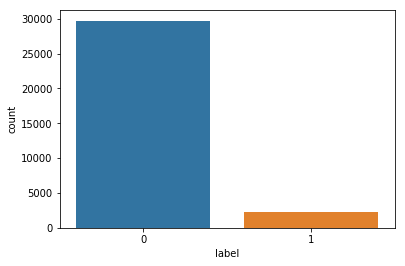

In [10]:
sns.countplot(tweets_df['label'])

total_tweets = len(tweets_df['label'])
num_neg = sum(tweets_df['label'])
num_pos = total_tweets-num_neg
print('The dataframe contains', total_tweets, 'tweets, of which',
      num_pos,'('+str(round(num_pos/total_tweets*100,1))+'%)', 'are labelled as positive and',
      num_neg, '('+str(round(num_neg/total_tweets*100,1))+'%) are labelled as negative')


In [11]:
#tweets_df['length'] = tweets_df['tweet'].apply(len)
#tweets_df['length'].hist(bins = 100)
#avg_len = tweets_df['length'].mean()
#tweets_df[tweets_df['length']==11]['tweet']

In [12]:
import string

In [13]:
import nltk # import natural language tool kit
nltk.download('stopwords')
from nltk.corpus import stopwords
StopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
def message_cleaning(message):
    message_wo_stopwords = ' '.join([words for words in message.split() if words not in StopWords])
    message_wo_stopwords_wo_punc = ''.join([char for char in message_wo_stopwords if char in string.ascii_lowercase + ' '])
    return message_wo_stopwords_wo_punc

In [16]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [17]:
tweets_df['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [18]:
tweets_df_clean.head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3                        model love u take u time ur  
4                        factsguide society motivation
Name: tweet, dtype: object

In [19]:
positive_words = ' '.join(list(tweets_df_clean[tweets_df['label']==0]))

In [20]:
negative_words = ' '.join(list(tweets_df_clean[tweets_df['label']==1]))

In [21]:
import wordcloud
from wordcloud import WordCloud

In [22]:
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap = 'PRGn').generate(positive_words)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap = 'gist_heat').generate(negative_words)

(-0.5, 399.5, 199.5, -0.5)

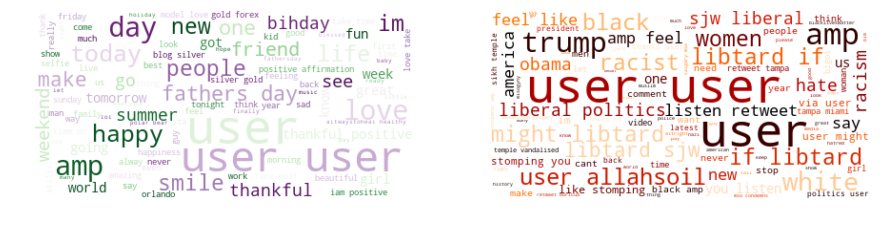

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0)
#plt.figure(figsize=(10,10))
axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[0].axis("off")
axs[1].axis("off")

In [24]:
#tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()
tweets_countvectorizer = CountVectorizer(dtype = 'uint8').fit_transform(tweets_df_clean).toarray()

In [25]:
tweets_countvectorizer.shape

(31962, 39753)

In [26]:
X = tweets_countvectorizer

In [27]:
y = tweets_df['label']

In [28]:
y.shape

(31962,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
y_predict_test = NB_classifier.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_predict_test)

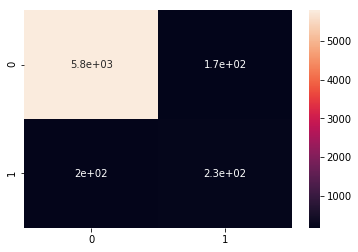

In [35]:
sns.heatmap(cm, annot = True)

In [36]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5958
           1       0.57      0.53      0.55       435

   micro avg       0.94      0.94      0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



To do: try a logistic regression classifier or an artifical neural network or an exit boost classifier
This is a baised data set, need to address the high proportion of positive tweets